In [62]:
%matplotlib inline

In [63]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import seaborn as sns
from scipy import stats
warnings.filterwarnings('ignore')

# File to Load 
file_to_load = ("employment_data_us.csv")

# Read employment data from Bureau of Labor Statistics 
employment_data = pd.read_csv(file_to_load)

###NATIONAL

# Selecting high tech occupations based on STEM guidelines
national_high_tech = employment_data.loc[employment_data['OCC_CODE'].isin(['15-3021','11-9121','15-1111','15-1121','15-1122','15-1131','15-1132',	'15-1133',	'15-1134',	'15-1141',
'15-1142','15-1143','15-1151','15-1152','15-1199','15-2011','15-2021','15-2031','15-2041','15-2091',
'15-2099','17-1021','17-1022','17-2011','17-2021','17-2031','17-2041','17-2051','17-2061','17-2071',
'17-2072','17-2081','17-2111','17-2112','17-2121','17-2131','17-2141','17-2151','17-2161','17-2171',
'17-2199','17-3012','17-3013','17-3019','17-3021','17-3022','17-3023','17-3024','17-3025','17-3026',
'17-3027','17-3029','17-3031','19-1011','19-1012','19-1013','19-1021','19-1022','19-1023','19-1029',
'19-1031','19-1032','19-1041','19-1042','19-1099','19-2011','19-2012','19-2021','19-2031','19-2032',
'19-2041','19-2042','19-2043','19-2099','19-4011','19-4021','19-4031','19-4041','19-4051','19-4091',
'19-4092','19-4093','25-1021','25-1022','25-1032','25-1041','25-1042','25-1043','25-1051','25-1052',
'25-1053','25-1054','41-4011','41-9031','11-9041','17-3011','19-4099','11-9111','25-1071','25-1072',
'29-1011','29-1021','29-1022','29-1023','29-1024','29-1029','29-1031','29-1041','29-1051','29-1061',
'29-1062','29-1063','29-1064','29-1065','29-1066','29-1067','29-1069','29-1071','29-1081','29-1122',
'29-1123','29-1124','29-1125','29-1126','29-1127','29-1128','29-1129','29-1131','29-1141','29-1151',
'29-1161','29-1171','29-1181','29-1199','29-2011','29-2012','29-2021','29-2031','29-2032','29-2033',
'29-2034','29-2035 ','29-2041','29-2051','29-2052','29-2053','29-2054','29-2055','29-2056','29-2057',
'29-2061','29-2071','29-2081','29-2091','29-2092','29-2099','29-9011','29-9012','29-9091','29-9092',
'29-9099','17-1011','17-1012','25-1031','19-3011','19-3022','19-3031','19-3032','19-3039','19-3041',
'19-3051','19-3091','19-3092','19-3094','19-3099','19-4061','25-1061','25-1062','25-1063','25-1064',
'25-1064','25-1065','25-1066','25-1067','25-1069',  
    
])]

#cleaning data
national_high_tech_cleaned = national_high_tech.loc[national_high_tech['OCC_GROUP'].isin(['detailed'])]

#creating new table with info
national_employment_info_t = national_high_tech_cleaned[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000','A_MEAN','A_MEDIAN']]


# Selecting non-high tech occupations excluding STEM codes
national_non_tech = employment_data.loc[~employment_data['OCC_CODE'].isin(['15-3021','11-9121','15-1111','15-1121','15-1122','15-1131','15-1132',	'15-1133',	'15-1134',	'15-1141',
'15-1142','15-1143','15-1151','15-1152','15-1199','15-2011','15-2021','15-2031','15-2041','15-2091',
'15-2099','17-1021','17-1022','17-2011','17-2021','17-2031','17-2041','17-2051','17-2061','17-2071',
'17-2072','17-2081','17-2111','17-2112','17-2121','17-2131','17-2141','17-2151','17-2161','17-2171',
'17-2199','17-3012','17-3013','17-3019','17-3021','17-3022','17-3023','17-3024','17-3025','17-3026',
'17-3027','17-3029','17-3031','19-1011','19-1012','19-1013','19-1021','19-1022','19-1023','19-1029',
'19-1031','19-1032','19-1041','19-1042','19-1099','19-2011','19-2012','19-2021','19-2031','19-2032',
'19-2041','19-2042','19-2043','19-2099','19-4011','19-4021','19-4031','19-4041','19-4051','19-4091',
'19-4092','19-4093','25-1021','25-1022','25-1032','25-1041','25-1042','25-1043','25-1051','25-1052',
'25-1053','25-1054','41-4011','41-9031','11-9041','17-3011','19-4099','11-9111','25-1071','25-1072',
'29-1011','29-1021','29-1022','29-1023','29-1024','29-1029','29-1031','29-1041','29-1051','29-1061',
'29-1062','29-1063','29-1064','29-1065','29-1066','29-1067','29-1069','29-1071','29-1081','29-1122',
'29-1123','29-1124','29-1125','29-1126','29-1127','29-1128','29-1129','29-1131','29-1141','29-1151',
'29-1161','29-1171','29-1181','29-1199','29-2011','29-2012','29-2021','29-2031','29-2032','29-2033',
'29-2034','29-2035 ','29-2041','29-2051','29-2052','29-2053','29-2054','29-2055','29-2056','29-2057',
'29-2061','29-2071','29-2081','29-2091','29-2092','29-2099','29-9011','29-9012','29-9091','29-9092',
'29-9099','17-1011','17-1012','25-1031','19-3011','19-3022','19-3031','19-3032','19-3039','19-3041',
'19-3051','19-3091','19-3092','19-3094','19-3099','19-4061','25-1061','25-1062','25-1063','25-1064',
'25-1064','25-1065','25-1066','25-1067','25-1069',  
    
])]

#cleaning data
national_non_tech_cleaned = national_non_tech.loc[national_non_tech['OCC_GROUP'].isin(['detailed'])]

#creating new table with info
national_employment_info_nt = national_non_tech_cleaned[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000','A_MEAN','A_MEDIAN']]
#--------------------------------------------------------------------------------------------------------------------------

###BY SELECTED CITIES

# Selecting only cities based on pairs of tech/non tech
data_by_city = employment_data.loc[employment_data['AREA_NAME'].isin(['Sacramento--Roseville--Arden-Arcade, CA',
                                        'San Jose-Sunnyvale-Santa Clara, CA',
                                        'Seattle-Bellevue-Everett, WA Metropolitan Division',
                                        'Portland-Vancouver-Hillsboro, OR-WA',
                                        'Austin-Round Rock-San Marcos, TX',
                                        'San Antonio-New Braunfels, TX',
                                       ])]

# File has total, major and detailed. Only using detailed to obtain data
data_by_city_cleaned = data_by_city.loc[data_by_city['OCC_GROUP'].isin(['detailed'])]

# Selecting high tech occupations based on STEM guidelines by cities
data_by_city_tech = data_by_city_cleaned.loc[employment_data['OCC_CODE'].isin(['15-3021','11-9121','15-1111','15-1121','15-1122',
'15-1131','15-1132','15-1133','15-1134','15-1141','25-1064','25-1065','25-1066','25-1067','25-1069',
'15-1142','15-1143','15-1151','15-1152','15-1199','15-2011','15-2021','15-2031','15-2041','15-2091',
'15-2099','17-1021','17-1022','17-2011','17-2021','17-2031','17-2041','17-2051','17-2061','17-2071',
'17-2072','17-2081','17-2111','17-2112','17-2121','17-2131','17-2141','17-2151','17-2161','17-2171',
'17-2199','17-3012','17-3013','17-3019','17-3021','17-3022','17-3023','17-3024','17-3025','17-3026',
'17-3027','17-3029','17-3031','19-1011','19-1012','19-1013','19-1021','19-1022','19-1023','19-1029',
'19-1031','19-1032','19-1041','19-1042','19-1099','19-2011','19-2012','19-2021','19-2031','19-2032',
'19-2041','19-2042','19-2043','19-2099','19-4011','19-4021','19-4031','19-4041','19-4051','19-4091',
'19-4092','19-4093','25-1021','25-1022','25-1032','25-1041','25-1042','25-1043','25-1051','25-1052',
'25-1053','25-1054','41-4011','41-9031','11-9041','17-3011','19-4099','11-9111','25-1071','25-1072',
'29-1011','29-1021','29-1022','29-1023','29-1024','29-1029','29-1031','29-1041','29-1051','29-1061',
'29-1062','29-1063','29-1064','29-1065','29-1066','29-1067','29-1069','29-1071','29-1081','29-1122',
'29-1123','29-1124','29-1125','29-1126','29-1127','29-1128','29-1129','29-1131','29-1141','29-1151',
'29-1161','29-1171','29-1181','29-1199','29-2011','29-2012','29-2021','29-2031','29-2032','29-2033',
'29-2034','29-2035 ','29-2041','29-2051','29-2052','29-2053','29-2054','29-2055','29-2056','29-2057',
'29-2061','29-2071','29-2081','29-2091','29-2092','29-2099','29-9011','29-9012','29-9091','29-9092',
'29-9099','17-1011','17-1012','25-1031','19-3011','19-3022','19-3031','19-3032','19-3039','19-3041',
'19-3051','19-3091','19-3092','19-3094','19-3099','19-4061','25-1061','25-1062','25-1063','25-1064',    
])]

# Selecting non-high tech occupations excluding STEM codes
data_by_city_non_tech = data_by_city_cleaned.loc[~employment_data['OCC_CODE'].isin(['15-3021','11-9121','15-1111','15-1121','15-1122',
'15-1131','15-1132','15-1133','15-1134','15-1141','25-1064','25-1065','25-1066','25-1067','25-1069',
'15-1142','15-1143','15-1151','15-1152','15-1199','15-2011','15-2021','15-2031','15-2041','15-2091',
'15-2099','17-1021','17-1022','17-2011','17-2021','17-2031','17-2041','17-2051','17-2061','17-2071',
'17-2072','17-2081','17-2111','17-2112','17-2121','17-2131','17-2141','17-2151','17-2161','17-2171',
'17-2199','17-3012','17-3013','17-3019','17-3021','17-3022','17-3023','17-3024','17-3025','17-3026',
'17-3027','17-3029','17-3031','19-1011','19-1012','19-1013','19-1021','19-1022','19-1023','19-1029',
'19-1031','19-1032','19-1041','19-1042','19-1099','19-2011','19-2012','19-2021','19-2031','19-2032',
'19-2041','19-2042','19-2043','19-2099','19-4011','19-4021','19-4031','19-4041','19-4051','19-4091',
'19-4092','19-4093','25-1021','25-1022','25-1032','25-1041','25-1042','25-1043','25-1051','25-1052',
'25-1053','25-1054','41-4011','41-9031','11-9041','17-3011','19-4099','11-9111','25-1071','25-1072',
'29-1011','29-1021','29-1022','29-1023','29-1024','29-1029','29-1031','29-1041','29-1051','29-1061',
'29-1062','29-1063','29-1064','29-1065','29-1066','29-1067','29-1069','29-1071','29-1081','29-1122',
'29-1123','29-1124','29-1125','29-1126','29-1127','29-1128','29-1129','29-1131','29-1141','29-1151',
'29-1161','29-1171','29-1181','29-1199','29-2011','29-2012','29-2021','29-2031','29-2032','29-2033',
'29-2034','29-2035 ','29-2041','29-2051','29-2052','29-2053','29-2054','29-2055','29-2056','29-2057',
'29-2061','29-2071','29-2081','29-2091','29-2092','29-2099','29-9011','29-9012','29-9091','29-9092',
'29-9099','17-1011','17-1012','25-1031','19-3011','19-3022','19-3031','19-3032','19-3039','19-3041',
'19-3051','19-3091','19-3092','19-3094','19-3099','19-4061','25-1061','25-1062','25-1063','25-1064',    
])]

#creating new tables for employment info and income info
employment_data_tech = data_by_city_tech[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000']]
income_data_tech = data_by_city_tech[['AREA_NAME','YEAR','A_MEAN','A_MEDIAN']]

employment_data_non_tech = data_by_city_non_tech[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000']]
income_data_non_tech = data_by_city_non_tech[['AREA_NAME','YEAR','A_MEAN','A_MEDIAN']]

employment_data_total = data_by_city_cleaned[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000']]
income_data_total = data_by_city_cleaned[['AREA_NAME','YEAR','A_MEAN','A_MEDIAN']]

#--------------------------------------------------------------------------------------------------------------------------
#CLEANING DATA 

#------ Tech Info 
employment_data_tech_cleaned = employment_data_tech.dropna(how='any')
income_data_tech_cleaned = income_data_tech.dropna(how='any')

#jobs_nt['TOT_EMP'] = jobs_nt.TOT_EMP.astype(float)
#jobs_nt['JOBS_1000'] = jobs_nt.JOBS_1000.astype(float)
#jobs_nt['YEAR'] = jobs_nt.YEAR.astype(float)
#inc_nt['A_MEAN'] = inc_nt.A_MEAN.astype(float)
#inc_nt['A_MEDIAN'] = inc_nt.A_MEDIAN.astype(float)

#------ Non Tech Info 

#jobs_ntt = empl_nt[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000']]
#inc_ntt = empl_nt[['AREA_NAME','YEAR','A_MEAN','A_MEDIAN']]
#jobs_ntt['TOT_EMP'] = jobs_ntt.TOT_EMP.astype(float)
#jobs_ntt['JOBS_1000'] = jobs_ntt.JOBS_1000.astype(float)
#jobs_ntt['YEAR'] = jobs_ntt.YEAR.astype(float)
#inc_ntt['A_MEAN'] = inc_ntt.A_MEAN.astype(float)
#inc_ntt['A_MEDIAN'] = inc_ntt.A_MEDIAN.astype(float)


employment_data_non_tech_cleaned = employment_data_non_tech.dropna(how='any')
income_data_non_tech_cleaned = income_data_non_tech.dropna(how='any')

#------ Total Info

employment_data_total_cleaned = employment_data_total.dropna(how='any')
income_data_total_cleaned = income_data_total.dropna(how='any')

#jobs_n['TOT_EMP'] = jobs_n.TOT_EMP.astype(float)
#jobs_n['JOBS_1000'] = jobs_n.JOBS_1000.astype(float)
#inc_n['A_MEAN'] = inc_n.A_MEAN.astype(float)
#inc_n['A_MEDIAN'] = inc_n.A_MEDIAN.astype(float)


#sample data
employment_data_tech_cleaned.head()

,AREA_NAME,YEAR,TOT_EMP,JOBS_1000
14354,"Sacramento--Roseville--Arden-Arcade, CA",2013,1390.0,1.657
14358,"Sacramento--Roseville--Arden-Arcade, CA",2013,1680.0,2.010
14359,"Sacramento--Roseville--Arden-Arcade, CA",2013,660.0,0.788
14396,"Sacramento--Roseville--Arden-Arcade, CA",2013,8860.0,10.575
14397,"Sacramento--Roseville--Arden-Arcade, CA",2013,510.0,0.609


In [64]:
# create pivots and group by to consolidate information
tech_info = pd.pivot_table(income_data_tech_cleaned,index=["AREA_NAME","YEAR"])
total_info_i = pd.pivot_table(income_data_total_cleaned,index=["AREA_NAME","YEAR"])
non_tech_info = pd.pivot_table(employment_data_non_tech_cleaned,index=["AREA_NAME","YEAR"])
tech_info_j = pd.pivot_table(employment_data_tech_cleaned,index=["AREA_NAME","YEAR"])
national_total = national_employment_info_t.groupby(["AREA_NAME","YEAR"]).sum()
national_total_avg = national_employment_info_t.groupby(["AREA_NAME","YEAR"]).mean()
national_total_nt = national_employment_info_nt.groupby(["AREA_NAME","YEAR"]).sum()
national_total_avg_nt = national_employment_info_nt.groupby(["AREA_NAME","YEAR"]).mean()

In [65]:
# manipulating data to graph

#High Tech Info - Income
tech_info_cleaned = tech_info.reset_index()

seattle = tech_info_cleaned.query('AREA_NAME == "Seattle-Bellevue-Everett, WA Metropolitan Division"')
portland = tech_info_cleaned.query('AREA_NAME == "Portland-Vancouver-Hillsboro, OR-WA"')
austin = tech_info_cleaned.query('AREA_NAME == "Austin-Round Rock-San Marcos, TX"')
san_antonio = tech_info_cleaned.query('AREA_NAME == "San Antonio-New Braunfels, TX"')
sacramento = tech_info_cleaned.query('AREA_NAME == "Sacramento--Roseville--Arden-Arcade, CA"')
san_jose = tech_info_cleaned.query('AREA_NAME == "San Jose-Sunnyvale-Santa Clara, CA"')

#Total - Income
tech_info_cleaned_t = total_info_i.reset_index()

seattle_t = total_info_i.query('AREA_NAME == "Seattle-Bellevue-Everett, WA Metropolitan Division"')
portland_t = total_info_i.query('AREA_NAME == "Portland-Vancouver-Hillsboro, OR-WA"')
austin_t = total_info_i.query('AREA_NAME == "Austin-Round Rock-San Marcos, TX"')
san_antonio_t = total_info_i.query('AREA_NAME == "San Antonio-New Braunfels, TX"')
sacramento_t = total_info_i.query('AREA_NAME == "Sacramento--Roseville--Arden-Arcade, CA"')
san_jose_t = total_info_i.query('AREA_NAME == "San Jose-Sunnyvale-Santa Clara, CA"')

#Non Tech Info - Jobs
non_tech_info_cleaned = non_tech_info.reset_index()

seattle_nt = non_tech_info_cleaned.query('AREA_NAME == "Seattle-Bellevue-Everett, WA Metropolitan Division"')
portland_nt = non_tech_info_cleaned.query('AREA_NAME == "Portland-Vancouver-Hillsboro, OR-WA"')
austin_nt = non_tech_info_cleaned.query('AREA_NAME == "Austin-Round Rock-San Marcos, TX"')
san_antonio_nt = non_tech_info_cleaned.query('AREA_NAME == "San Antonio-New Braunfels, TX"')
sacramento_nt = non_tech_info_cleaned.query('AREA_NAME == "Sacramento--Roseville--Arden-Arcade, CA"')
san_jose_nt = non_tech_info_cleaned.query('AREA_NAME == "San Jose-Sunnyvale-Santa Clara, CA"')
seattle_nt

#Tech Info - Jobs
tech_info_cleaned_j = tech_info_j.reset_index()

seattle_ty = tech_info_cleaned_j.query('AREA_NAME == "Seattle-Bellevue-Everett, WA Metropolitan Division"')
portland_ty = tech_info_cleaned_j.query('AREA_NAME == "Portland-Vancouver-Hillsboro, OR-WA"')
austin_ty = tech_info_cleaned_j.query('AREA_NAME == "Austin-Round Rock-San Marcos, TX"')
san_antonio_ty = tech_info_cleaned_j.query('AREA_NAME == "San Antonio-New Braunfels, TX"')
sacramento_ty = tech_info_cleaned_j.query('AREA_NAME == "Sacramento--Roseville--Arden-Arcade, CA"')
san_jose_ty = tech_info_cleaned_j.query('AREA_NAME == "San Jose-Sunnyvale-Santa Clara, CA"')


#national Info -tech
national_tech_total = national_total.query('YEAR == 2017').reset_index()
national_total_avg =national_total_avg.query('YEAR == 2017').reset_index()

tech = pd.DataFrame()

tech['TOT_EMP'] = national_tech_total['TOT_EMP']
tech['JOBS_1000'] = national_tech_total['JOBS_1000']
tech['A_MEDIAN'] = national_total_avg['A_MEDIAN']
tech['A_MEAN'] = national_total_avg['A_MEAN']


#national Info -non-tech
national_non_tech_total = national_total_nt.groupby(["AREA_NAME","YEAR"]).sum()
national_non_total_avg = national_total_avg_nt.groupby(["AREA_NAME","YEAR"]).mean()

national_ntech_total = national_non_tech_total.query('YEAR == 2017').reset_index()
national_ntotal_avg = national_non_total_avg.query('YEAR == 2017').reset_index()

n_tech = pd.DataFrame()

n_tech['TOT_EMP'] = national_ntech_total['TOT_EMP']
n_tech['JOBS_1000'] = national_ntech_total['JOBS_1000']
n_tech['A_MEDIAN'] = national_ntotal_avg['A_MEDIAN']
n_tech['A_MEAN'] = national_ntotal_avg['A_MEAN']


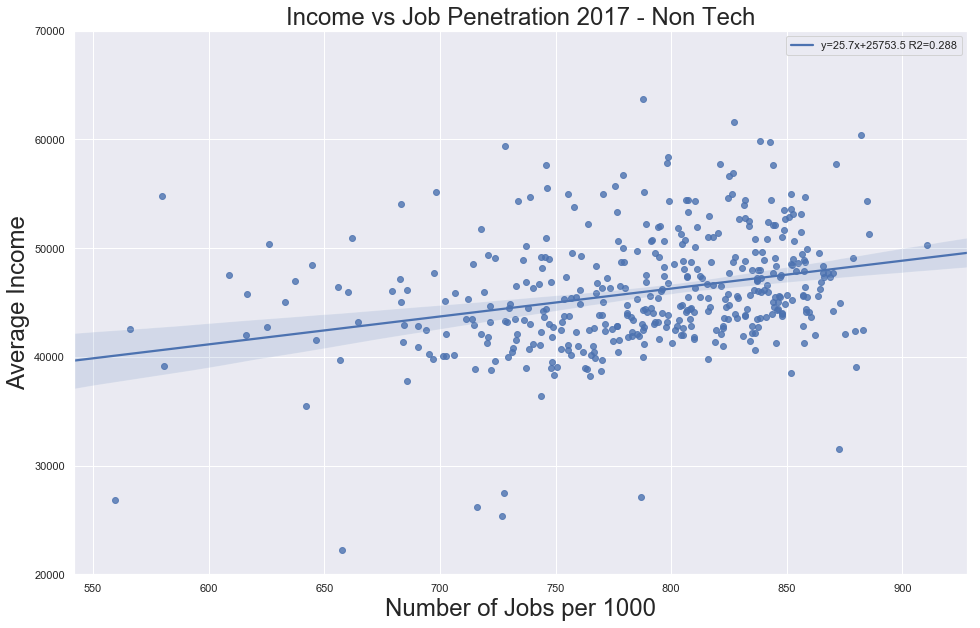

In [80]:
#Graphing total employment/average mean - NATIONAL

slope, intercept, r_value, p_value, std_err = stats.linregress(n_tech['JOBS_1000'],n_tech['A_MEAN'])

ax = sns.regplot(x="JOBS_1000", y="A_MEAN", data=n_tech, color='b',
 line_kws={'label':"y={0:.1f}x+{1:.1f} R2={2:.3f}".format(slope,intercept,r_value)})
line_kws={r_value}

plt.ylim(ylim)


fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.xlabel('Number of Jobs per 1000',fontsize=24)
plt.ylabel('Average Income',fontsize=24)
plt.title('Income vs Job Penetration 2017 - Non Tech',fontsize=24)
ax.legend()
plt.savefig(f"Income vs Job Penetration 2017 - Non Tech'.png",fontsize=24)
plt.show()

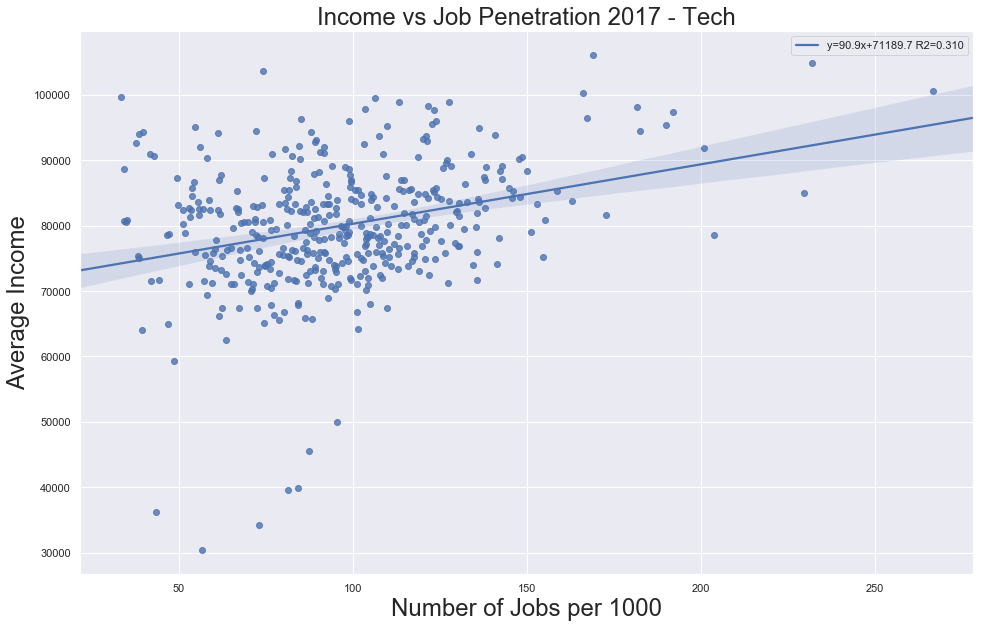

In [81]:
#Graphing tech employment/average mean - NATIONAL

slope, intercept, r_value, p_value, std_err = stats.linregress(tech['JOBS_1000'],tech['A_MEAN'])

ax = sns.regplot(x="JOBS_1000", y="A_MEAN", data=tech, color='b', 

line_kws={'label':"y={0:.1f}x+{1:.1f} R2={2:.3f}".format(slope,intercept,r_value)})



fig2 = plt.gcf()
fig2.set_size_inches( 16, 10)
plt.xlabel('Number of Jobs per 1000',fontsize=24)
plt.ylabel('Average Income',fontsize=24)
plt.title('Income vs Job Penetration 2017 - Tech',fontsize=24)
ax.legend()
plt.savefig(f"Income vs Job Penetration 2017 - Tech.png",fontsize=24)
plt.show()

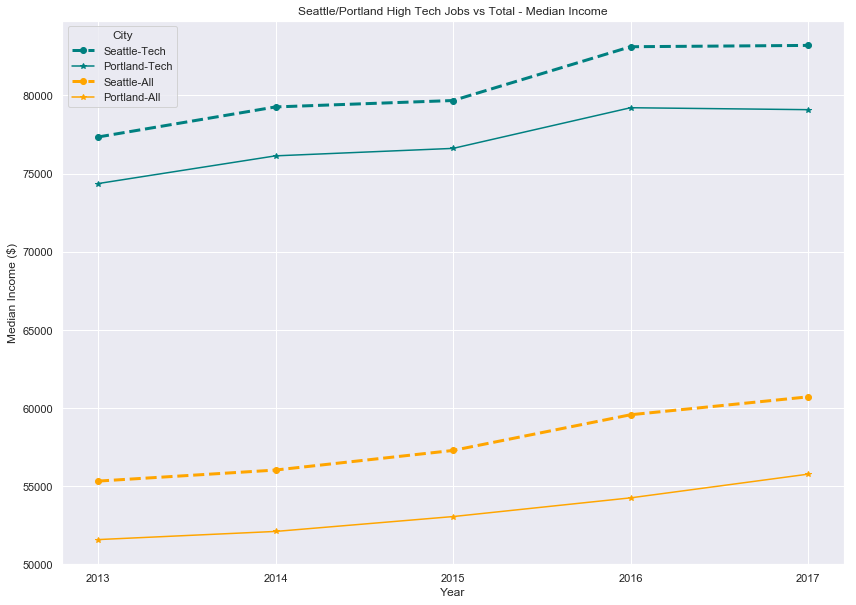

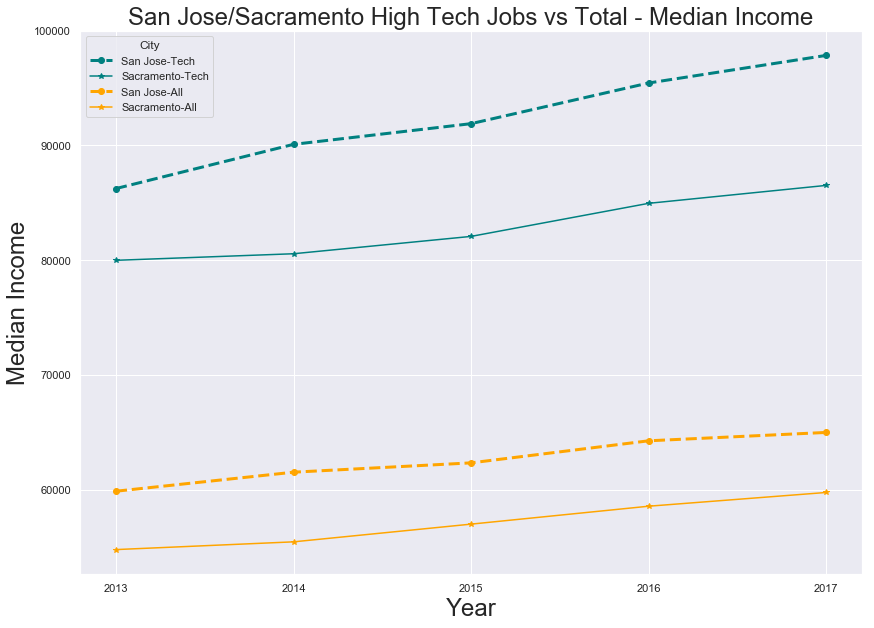

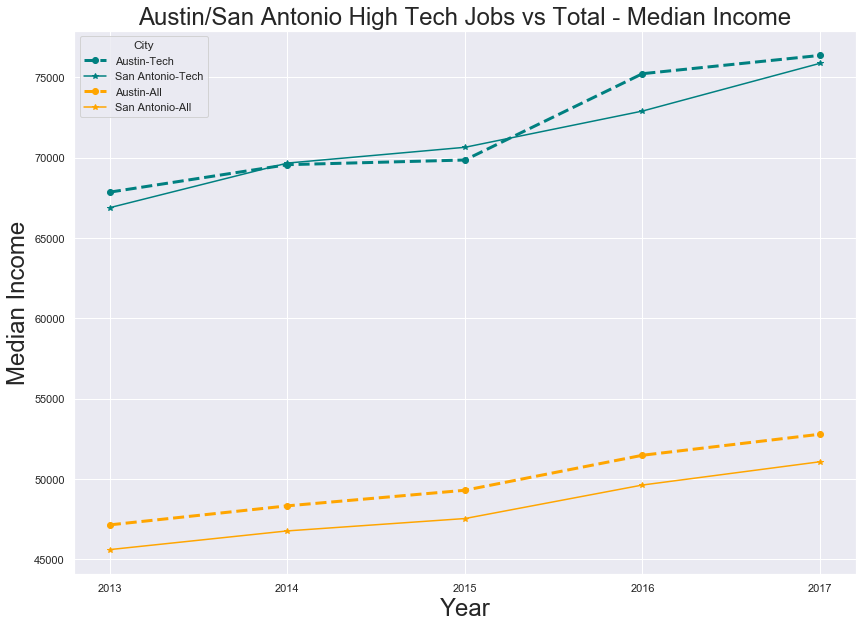

In [83]:
#Graphing city pairs tech income vs total income
#Seattle/Portland

x_axis = [2013,2014,2015,2016,2017]

y_axis_s = seattle['A_MEDIAN']
y_axis_st = seattle_t['A_MEDIAN']
y_axis_p = portland['A_MEDIAN']
y_axis_pt = portland_t['A_MEDIAN']

plt.figure(1, figsize=(14,10))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_s,'o--', color='teal', label='Seattle-Tech', linewidth=3)
plt.plot(x_axis, y_axis_p, '*-', color='teal', label='Portland-Tech')
plt.plot(x_axis, y_axis_st,'o--', color='orange', label='Seattle-All', linewidth=3)
plt.plot(x_axis, y_axis_pt, '*-', color='orange',label='Portland-All')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Median Income ($)')
plt.title('Seattle/Portland High Tech Jobs vs Total - Median Income')
plt.savefig("Seattle_Portland High Tech Jobs vs Total - Median Income.png")
plt.show()

#--------------------------------------------------------------------------------------------------------------------------

#San Jose / Sacramento

y_axis_sj = san_jose['A_MEDIAN']
y_axis_sjt = san_jose_t['A_MEDIAN']
y_axis_sa = sacramento['A_MEDIAN']
y_axis_sat = sacramento_t['A_MEDIAN']

plt.figure(2, figsize=(14,10))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_sj,'o--', color='teal', label='San Jose-Tech', linewidth=3)
plt.plot(x_axis, y_axis_sa, '*-', color='teal', label='Sacramento-Tech')
plt.plot(x_axis, y_axis_sjt,'o--', color='orange', label='San Jose-All', linewidth=3)
plt.plot(x_axis, y_axis_sat, '*-', color='orange',label='Sacramento-All')

plt.legend(title="City", loc = "best")
plt.xlabel('Year',fontsize=24)
plt.ylabel('Median Income',fontsize=24)
plt.title('San Jose/Sacramento High Tech Jobs vs Total - Median Income',fontsize=24)

plt.savefig(f"San Jose_Sacramento High Tech Jobs vs Total - Median Income.png")
plt.show()

#--------------------------------------------------------------------------------------------------------------------------

#Austin / San Antonio

y_axis_a = austin['A_MEDIAN']
y_axis_at = austin_t['A_MEDIAN']
y_axis_sa = san_antonio['A_MEDIAN']
y_axis_sat = san_antonio_t['A_MEDIAN']

plt.figure(3, figsize=(14,10))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_a,'o--', color='teal', label='Austin-Tech', linewidth=3)
plt.plot(x_axis, y_axis_sa, '*-', color='teal', label='San Antonio-Tech')
plt.plot(x_axis, y_axis_at,'o--', color='orange', label='Austin-All', linewidth=3)
plt.plot(x_axis, y_axis_sat, '*-', color='orange',label='San Antonio-All')


plt.legend(title="City", loc = "best")
plt.xlabel('Year',fontsize=24)
plt.ylabel('Median Income',fontsize=24)
plt.title('Austin/San Antonio High Tech Jobs vs Total - Median Income',fontsize=24)
plt.savefig(f"Austin_San Antonio High Tech Jobs vs Total - Median Income.png")

plt.show()

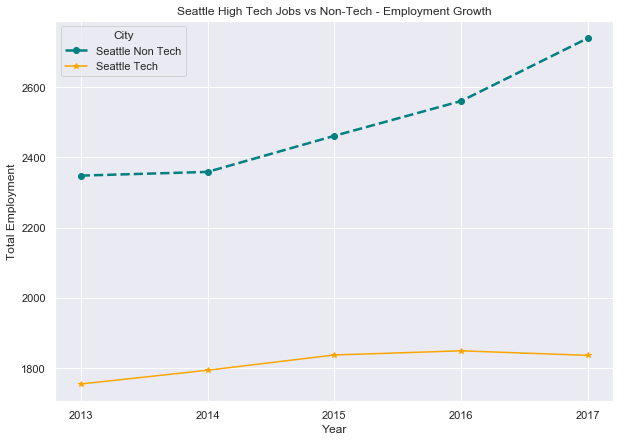

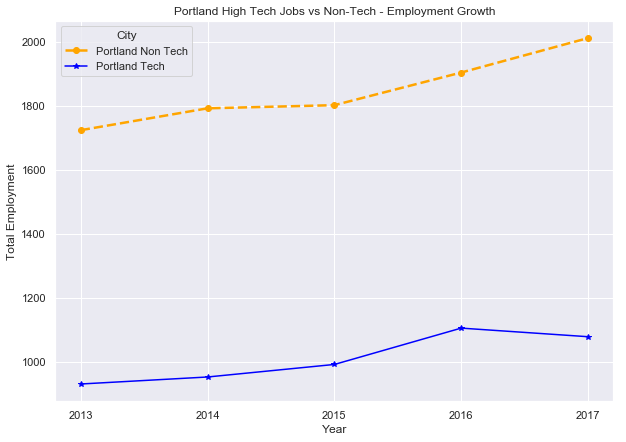

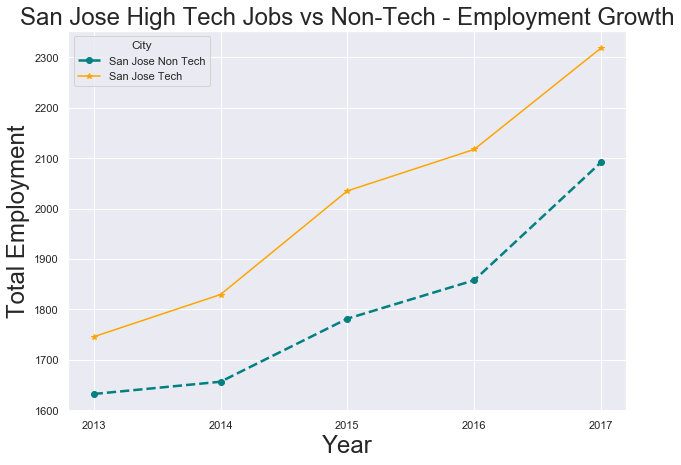

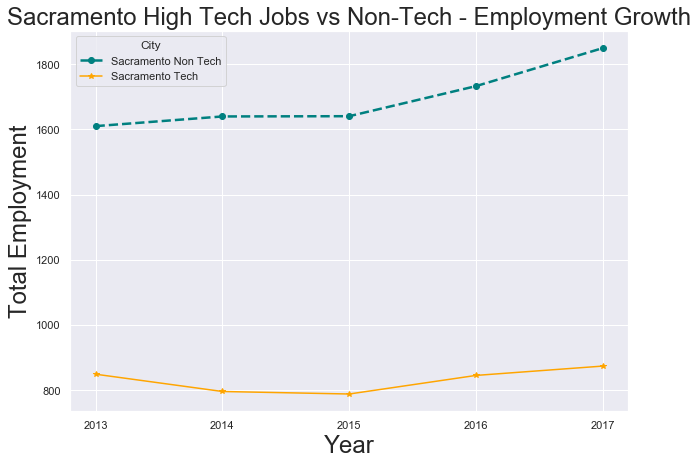

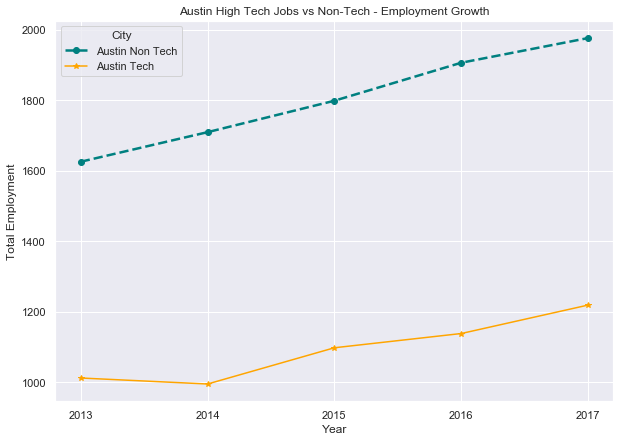

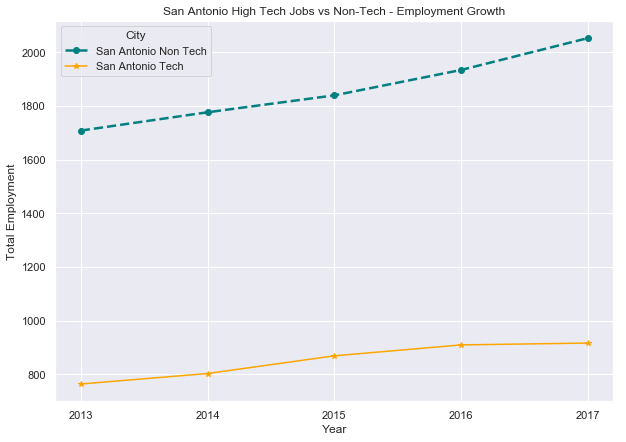

In [87]:
#Graphing tech vs non-tech employment jobs per city
#Seattle
x_axis = [2013,2014,2015,2016,2017]

y_axis_seattle_nt = seattle_nt['TOT_EMP']
y_axis_seattle_t = seattle_ty['TOT_EMP']
y_axis_portland_nt = portland_nt['TOT_EMP']
y_axis_portland_t = portland_ty['TOT_EMP']
y_axis_san_jose_nt = san_jose_nt['TOT_EMP']
y_axis_san_jose_t = san_jose_ty['TOT_EMP']
y_axis_sacramento_nt = sacramento_nt['TOT_EMP']
y_axis_sacramento_t = sacramento_ty['TOT_EMP']
y_axis_austin_nt = austin_nt['TOT_EMP']
y_axis_austin_t = austin_ty['TOT_EMP']
y_axis_san_antoio_nt = san_antonio_nt['TOT_EMP']
y_axis_san_antoio_t = san_antonio_ty['TOT_EMP']


plt.figure(4, figsize=(10,7))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_seattle_nt,'o--', color='teal', label='Seattle Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_seattle_t, '*-', color='orange', label='Seattle Tech')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.title('Seattle High Tech Jobs vs Non-Tech - Employment Growth')
plt.savefig(f"Seattle High Tech Jobs vs Non-Tech - Employment Growth.png")

#Portland
plt.figure(5, figsize=(10,7))
plt.grid(True)
plt.xticks(x_axis)
plt.plot(x_axis, y_axis_portland_nt,'o--', color='orange', label='Portland Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_portland_t, '*-', color='blue',label='Portland Tech')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.title('Portland High Tech Jobs vs Non-Tech - Employment Growth')
plt.savefig(f"Portland High Tech Jobs vs Non-Tech - Employment Growth.png")

plt.show()

#San Jose
plt.figure(6, figsize=(10,7))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_san_jose_nt,'o--', color='teal', label='San Jose Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_san_jose_t, '*-', color='orange', label='San Jose Tech')

plt.legend(title="City", loc = "best")
plt.xlabel('Year',fontsize=24)
plt.ylabel('Total Employment',fontsize=24)
plt.title('San Jose High Tech Jobs vs Non-Tech - Employment Growth',fontsize=24)
plt.savefig(f"San Jose High Tech Jobs vs Non-Tech - Employment Growth.png",fontsize=24)

plt.show()

#Sacramento
plt.figure(7, figsize=(10,7))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_sacramento_nt,'o--', color='teal', label='Sacramento Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_sacramento_t, '*-', color='orange', label='Sacramento Tech')

plt.legend(title="City", loc = "best")
plt.xlabel('Year',fontsize=24)
plt.ylabel('Total Employment',fontsize=24)
plt.title('Sacramento High Tech Jobs vs Non-Tech - Employment Growth',fontsize=24)
plt.savefig(f"Sacramento High Tech Jobs vs Non-Tech - Employment Growth.png")

plt.show()

#Austin
plt.figure(8, figsize=(10,7))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_austin_nt,'o--', color='teal', label='Austin Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_austin_t, '*-', color='orange', label='Austin Tech')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.title('Austin High Tech Jobs vs Non-Tech - Employment Growth')
plt.savefig(f"Austin High Tech Jobs vs Non-Tech - Employment Growth.png")

plt.show()

#San Antonio
plt.figure(9, figsize=(10,7))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_san_antoio_nt,'o--', color='teal', label='San Antonio Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_san_antoio_t, '*-', color='orange', label='San Antonio Tech')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.title('San Antonio High Tech Jobs vs Non-Tech - Employment Growth')
plt.savefig(f"San Antonio High Tech Jobs vs Non-Tech - Employment Growth.png")

plt.show()

In [73]:
n_tech.describe()

,TOT_EMP,JOBS_1000,A_MEDIAN,A_MEAN
count,4.220000e+02,422.000000,422.000000,422.000000
mean,2.489429e+05,787.682244,43198.083581,45963.941872
std,5.013527e+05,60.471231,5072.734660,5379.890965
min,6.490000e+03,559.523000,21347.142857,22250.779221
25%,4.325250e+04,749.754000,40134.881682,42727.410506
50%,8.054500e+04,797.001500,42738.707077,45433.362652
75%,2.156425e+05,836.205250,46056.460296,48913.343103
max,5.905990e+06,910.498000,59650.211765,63745.821596
